In [1]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pq

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# загрузим данные
transactions_data = pd.read_parquet('transactions.parquet', engine='pyarrow')

посмотрим, что за данные мы загрузили:

In [4]:
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32109414 entries, 0 to 32109413
Data columns (total 9 columns):
 #   Column        Dtype         
---  ------        -----         
 0   chq_id        object        
 1   plant         object        
 2   chq_date      datetime64[ns]
 3   chq_position  object        
 4   client_id     object        
 5   material      object        
 6   sales_count   float64       
 7   sales_sum     float64       
 8   is_promo      int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 2.2+ GB


32 млн. записей! нужно быть аккуратнее с выбором методов анализа такого датасета!

из описания следует, что "transactions.parquet" содержит данные о покупах: какие товары клиент приобрел (чек)

In [5]:
transactions_data.head(20)

,chq_id,plant,chq_date,chq_position,client_id,material,sales_count,sales_sum,is_promo
0,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,004,90fca68123e692a005a4edeadd94b2f2,232cfe8b28970434f685b737737b26d4,2.000,146.98,0
1,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,003,90fca68123e692a005a4edeadd94b2f2,12ec64451b8e426db16f3f05ea770901,1.000,249.99,1
2,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,012,90fca68123e692a005a4edeadd94b2f2,1212ff8ecf53aebef093ca8ae216db68,1.000,47.99,1
3,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,013,90fca68123e692a005a4edeadd94b2f2,1212ff8ecf53aebef093ca8ae216db68,1.000,47.99,1
4,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,011,90fca68123e692a005a4edeadd94b2f2,571c6d3b559db8445e05265649eb30ab,2.000,53.98,1
5,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,001,90fca68123e692a005a4edeadd94b2f2,76608b1b1d38384fcac3e2b14e6ec0c9,2.000,64.78,1
6,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,006,90fca68123e692a005a4edeadd94b2f2,86069eddeab2b94b00eca5801628c879,0.728,65.51,0
7,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,010,90fca68123e692a005a4edeadd94b2f2,cd8645ab842a98332560a07d137aed24,1.000,36.99,1
8,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,007,90fca68123e692a005a4edeadd94b2f2,f6f07df28266b03cb7822b62abf0a385,2.000,72.99,1
9,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,005,90fca68123e692a005a4edeadd94b2f2,b726b2ec8d0643d38e29d96733153dd4,2.000,51.98,1


In [6]:
print('данные о покупах за период с', transactions_data.chq_date.min(), 'по', transactions_data.chq_date.max())

данные о покупах за период с 2016-10-04 00:00:00 по 2017-10-04 00:00:00


In [7]:
print('кол-во уникальных клиентов:', transactions_data.client_id.nunique())

кол-во уникальных клиентов: 100000


In [8]:
# сделаем выборку из общей базы: клиент, дата покупки, сумма покупки
data_for_analysis = transactions_data.groupby(['client_id', 'chq_date'], as_index=False).sales_sum.sum()

In [9]:
data_for_analysis

,client_id,chq_date,sales_sum
0,0000d48a8891cd462fdf01ea861ec53e,2016-10-31,1655.0
1,0000d48a8891cd462fdf01ea861ec53e,2016-11-20,2475.0
2,0000d48a8891cd462fdf01ea861ec53e,2016-12-01,4481.0
3,0000d48a8891cd462fdf01ea861ec53e,2016-12-10,2030.0
4,0000d48a8891cd462fdf01ea861ec53e,2016-12-13,1502.0
...,...,...,...
2480209,fffc477269ae5f219e39aa51fa7abb81,2017-05-14,3882.0
2480210,fffc477269ae5f219e39aa51fa7abb81,2017-06-20,6661.0
2480211,fffd3e78e3ea6bf00aee1372efc09dad,2016-10-11,1213.0
2480212,fffd3e78e3ea6bf00aee1372efc09dad,2016-12-03,220.0


с таким датасетом работать будет попроще - всего около 2,5 млн. записей

In [10]:
# освободим память, занятую основным датасетом
del transactions_data

In [12]:
# если поле "chq_date" было бы не типа "datetime", то нужно было бы сделать следующее преобразование:
# data_for_analysis['chq_date'] = pd.to_datetime(data_for_analysis['chq_date'])

само по себе кол-во покупок еще ни о чем не говорит, т.к. клиент мог совершать покупки несколько раз в начале анализируемого периода, а потом перестать покупать вообще, или наоборот - клиент новый и только сделал 1-2 покупки в конце анализируемого периода.
получается, что самой важной информацией об оттоке клиентов будет дата последней покупки, и даже более информативно: кол-во дней с момента последней покупки до конца анализируемого периода.
возможно, еще одной важной характеристикой будет периодичность, с которой клиент совершает покупки.

In [13]:
period_days = data_for_analysis.groupby('client_id').chq_date.apply(list).apply(np.diff).values

In [14]:
period_days = pd.Series(np.concatenate(period_days, axis=0)).dt.days

In [15]:
period_days

0           20
1           11
2            9
3            3
4           14
          ... 
2380209    138
2380210     44
2380211     37
2380212     53
2380213     90
Length: 2380214, dtype: int64

Для разбивки клиентов на группы попробуем применить классический RFM-анализ.
R - Recency — количество времени (дней), прошедшего с момента последней покупки клиента.
F - Frequency — частота покупок, их общее число.
M - Monetary — общая сумма покупок клиента (за выбранный период).

In [16]:
# сформируем таблицу для RFM-анализа
data_RFM_analysis = data_for_analysis.groupby(['client_id'], as_index=False)\
    .agg({'chq_date': 'max', 
          'sales_sum': ['count','sum']})
data_RFM_analysis.columns =['client', 'last_date', 'Frequency', 'Monetary']

In [17]:
data_RFM_analysis

,client,last_date,Frequency,Monetary
0,0000d48a8891cd462fdf01ea861ec53e,2017-08-31,36,85898.00
1,00028a1dcb30863404a386961a69300e,2017-09-15,30,51916.00
2,0004274683494a9eca5e70ef97299d55,2017-10-04,151,101130.00
3,00072f81efcb3481861f7300c5e2a88a,2017-09-07,8,5125.00
4,00076596eb749cf10c2e984621dffe95,2017-10-04,131,203833.46
...,...,...,...,...
99995,fffb2f36eb72ff56d2ef7a2685714f01,2017-09-16,22,59813.00
99996,fffb50df95231c0f090b5aa3f5332c7f,2017-05-16,13,19016.00
99997,fffc3f2be1422d248dbeda4196ef0711,2017-09-24,29,34752.00
99998,fffc477269ae5f219e39aa51fa7abb81,2017-06-20,5,40915.00


In [18]:
# для каждого клиента посчитаем количество дней, прошедших со дня последней покупки (до конца анализируемого периода) - Recency
max_date = data_for_analysis.chq_date.max()
data_RFM_analysis['max_date'] = max_date
data_RFM_analysis['Recency'] = (data_RFM_analysis['max_date'] - data_RFM_analysis['last_date']).dt.days
data_RFM_analysis.drop('max_date', axis = 1, inplace = True)
# last_date пока оставим

In [20]:
data_RFM_analysis

,client,last_date,Frequency,Monetary,Recency,mean_sales
0,0000d48a8891cd462fdf01ea861ec53e,2017-08-31,36,85898.00,34,2386.055556
1,00028a1dcb30863404a386961a69300e,2017-09-15,30,51916.00,19,1730.533333
2,0004274683494a9eca5e70ef97299d55,2017-10-04,151,101130.00,0,669.735099
3,00072f81efcb3481861f7300c5e2a88a,2017-09-07,8,5125.00,27,640.625000
4,00076596eb749cf10c2e984621dffe95,2017-10-04,131,203833.46,0,1555.980611
...,...,...,...,...,...,...
99995,fffb2f36eb72ff56d2ef7a2685714f01,2017-09-16,22,59813.00,18,2718.772727
99996,fffb50df95231c0f090b5aa3f5332c7f,2017-05-16,13,19016.00,141,1462.769231
99997,fffc3f2be1422d248dbeda4196ef0711,2017-09-24,29,34752.00,10,1198.344828
99998,fffc477269ae5f219e39aa51fa7abb81,2017-06-20,5,40915.00,106,8183.000000


<AxesSubplot:ylabel='Frequency'>

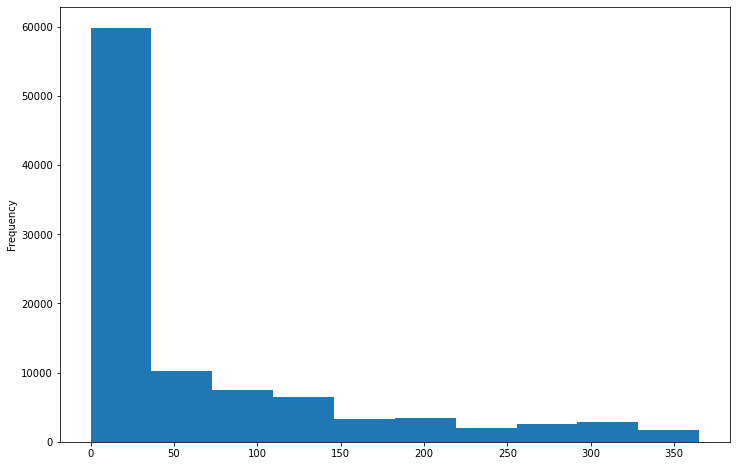

In [21]:
data_RFM_analysis['Recency'].plot(kind="hist", figsize=(12,8))

In [26]:
# разобьем всех клиентов на три группы по показателю Recency
R33 = data_RFM_analysis['Recency'].quantile(0.33)
R66 = data_RFM_analysis['Recency'].quantile(0.66)
print(R33, '::', R66)

9.0 :: 54.0


In [27]:
# 1 — давние
# 2 — «спящие» (относительно недавние)
# 3 — недавние

data_RFM_analysis['R'] = data_RFM_analysis.apply(
    lambda x: 3 if x.Recency <= R33 else (2 if x.Recency <= R66 else 1),
    axis=1)

<AxesSubplot:ylabel='Frequency'>

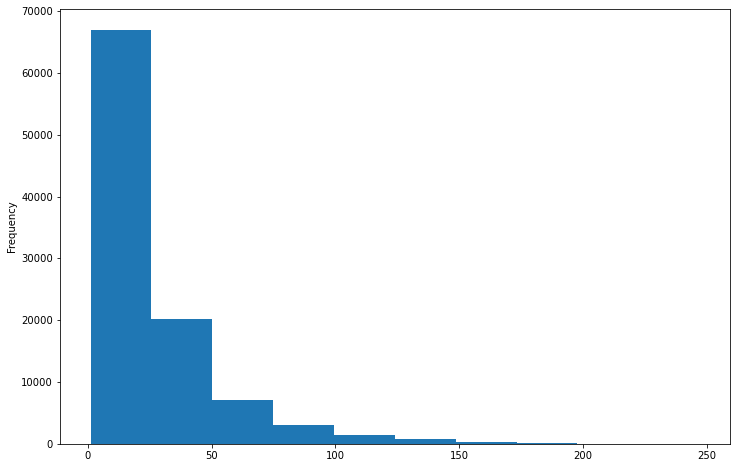

In [28]:
data_RFM_analysis['Frequency'].plot(kind="hist", figsize=(12,8))

In [29]:
# разобьем всех клиентов на три группы по показателю Frequency
F33 = data_RFM_analysis['Frequency'].quantile(0.33)
F66 = data_RFM_analysis['Frequency'].quantile(0.66)
print(F33, '::', F66)

10.0 :: 25.0


In [30]:
# 1 — разовые
# 2 — редкие
# 3 — частые

data_RFM_analysis['F'] = data_RFM_analysis.apply(
    lambda x: 1 if x.Frequency <= F33 else (2 if x.Frequency <= F66 else 3),
    axis=1)

<AxesSubplot:ylabel='Frequency'>

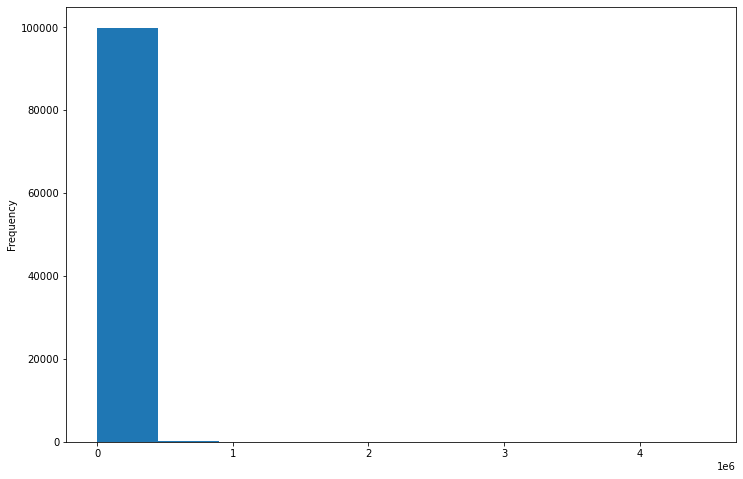

In [31]:
data_RFM_analysis['Monetary'].plot(kind="hist", figsize=(12,8))

In [32]:
# разобьем всех клиентов на три группы по показателю Monetary
M33 = data_RFM_analysis['Monetary'].quantile(0.33)
M66 = data_RFM_analysis['Monetary'].quantile(0.66)
print(M33, '::', M66)

12932.0 :: 37113.22439999999


In [33]:
# 1 — небольшие покупки
# 2 — средние покупки
# 3 — большие покупки

data_RFM_analysis['M'] = data_RFM_analysis.apply(
    lambda x: 1 if x.Monetary <= M33 else (2 if x.Monetary <= M66 else 3),
    axis=1)

In [34]:
data_RFM_analysis

,client,last_date,Frequency,Monetary,Recency,mean_sales,R,F,M
0,0000d48a8891cd462fdf01ea861ec53e,2017-08-31,36,85898.00,34,2386.055556,2,3,3
1,00028a1dcb30863404a386961a69300e,2017-09-15,30,51916.00,19,1730.533333,2,3,3
2,0004274683494a9eca5e70ef97299d55,2017-10-04,151,101130.00,0,669.735099,3,3,3
3,00072f81efcb3481861f7300c5e2a88a,2017-09-07,8,5125.00,27,640.625000,2,1,1
4,00076596eb749cf10c2e984621dffe95,2017-10-04,131,203833.46,0,1555.980611,3,3,3
...,...,...,...,...,...,...,...,...,...
99995,fffb2f36eb72ff56d2ef7a2685714f01,2017-09-16,22,59813.00,18,2718.772727,2,2,3
99996,fffb50df95231c0f090b5aa3f5332c7f,2017-05-16,13,19016.00,141,1462.769231,1,2,2
99997,fffc3f2be1422d248dbeda4196ef0711,2017-09-24,29,34752.00,10,1198.344828,2,3,2
99998,fffc477269ae5f219e39aa51fa7abb81,2017-06-20,5,40915.00,106,8183.000000,1,1,3


In [35]:
#  рассчитаем RFM-код для каждого клиента
data_RFM_analysis['RFM'] = data_RFM_analysis['R']*100 + data_RFM_analysis['F']*10 + data_RFM_analysis['M']

In [37]:
data_RFM_analysis

,client,last_date,Frequency,Monetary,Recency,mean_sales,R,F,M,RFM
0,0000d48a8891cd462fdf01ea861ec53e,2017-08-31,36,85898.00,34,2386.055556,2,3,3,233
1,00028a1dcb30863404a386961a69300e,2017-09-15,30,51916.00,19,1730.533333,2,3,3,233
2,0004274683494a9eca5e70ef97299d55,2017-10-04,151,101130.00,0,669.735099,3,3,3,333
3,00072f81efcb3481861f7300c5e2a88a,2017-09-07,8,5125.00,27,640.625000,2,1,1,211
4,00076596eb749cf10c2e984621dffe95,2017-10-04,131,203833.46,0,1555.980611,3,3,3,333
...,...,...,...,...,...,...,...,...,...,...
99995,fffb2f36eb72ff56d2ef7a2685714f01,2017-09-16,22,59813.00,18,2718.772727,2,2,3,223
99996,fffb50df95231c0f090b5aa3f5332c7f,2017-05-16,13,19016.00,141,1462.769231,1,2,2,122
99997,fffc3f2be1422d248dbeda4196ef0711,2017-09-24,29,34752.00,10,1198.344828,2,3,2,232
99998,fffc477269ae5f219e39aa51fa7abb81,2017-06-20,5,40915.00,106,8183.000000,1,1,3,113


In [38]:
# посмотрим как клиенты распределились по группам (сколько клиентов в каждой группе)
data_RFM_analysis.groupby('RFM', as_index=False).client.count()

,RFM,client
0,111,18258
1,112,4812
2,113,426
3,121,2530
4,122,3927
5,123,1415
6,131,253
7,132,960
8,133,1180
9,211,4904


<AxesSubplot:ylabel='client'>

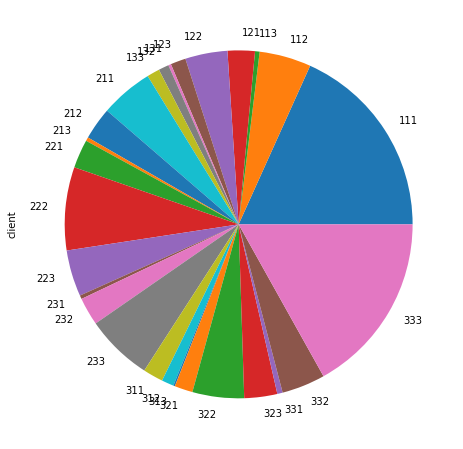

In [82]:
data_RFM_analysis.groupby('RFM').client.count().plot(kind="pie", figsize=(12,8))

Наблюдается перекос с количеством клиентов попавших в группы 111 и 333.

Посмотрим как связаны величины Recency (давность последней покупки) и Monetary (Общая сумма всех покупок)

<AxesSubplot:xlabel='Recency', ylabel='Monetary'>

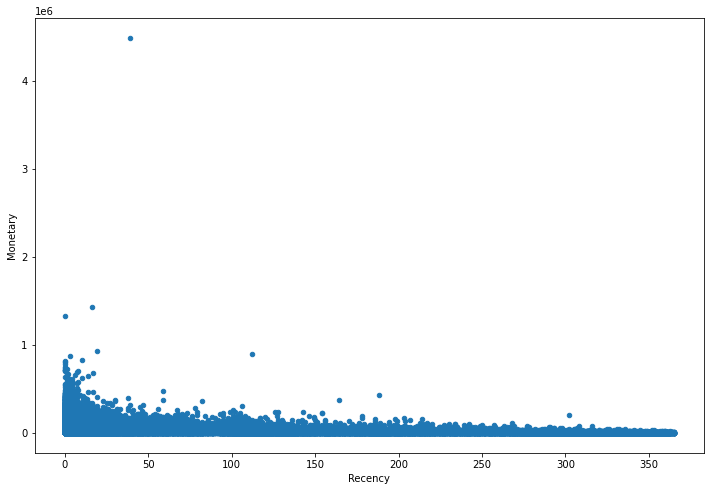

In [39]:
data_RFM_analysis.plot(x="Recency", y="Monetary", kind="scatter", figsize=(12,8))

На графике присутствует явный выброс - клиент с суммой покупок более 4 млн.

In [40]:
data_RFM_analysis.describe()

,Frequency,Monetary,Recency,mean_sales,R,F,M,RFM
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,24.802140,3.945829e+04,65.551910,1772.639737,2.003620,1.980750,2.009990,222.179490
std,25.876797,5.204415e+04,89.157254,2059.068443,0.823914,0.823763,0.818485,87.876122
min,1.000000,-2.584060e+03,0.000000,-861.353333,1.000000,1.000000,1.000000,111.000000
25%,8.000000,9.451000e+03,5.000000,835.390357,1.000000,1.000000,1.000000,121.000000
50%,16.000000,2.255700e+04,21.000000,1401.000000,2.000000,2.000000,2.000000,222.000000
75%,32.000000,5.011700e+04,101.000000,2259.000000,3.000000,3.000000,3.000000,322.000000
max,247.000000,4.487191e+06,365.000000,448719.100000,3.000000,3.000000,3.000000,333.000000


In [61]:
data_RFM_analysis[data_RFM_analysis['Monetary'] == data_RFM_analysis['Monetary'].max()]

,client,last_date,Frequency,Monetary,Recency,mean_sales,R,F,M,RFM,churn
34739,596f837a638189cb15e9d4b144dd45c4,2017-08-26,10,4487191.0,39,448719.1,2,1,3,213,0


Попробуем посмотреть на график без этого клиента.

In [41]:
data_RFM_analysis = data_RFM_analysis[data_RFM_analysis['Monetary'] < data_RFM_analysis['Monetary'].max()]

<AxesSubplot:xlabel='Recency', ylabel='Monetary'>

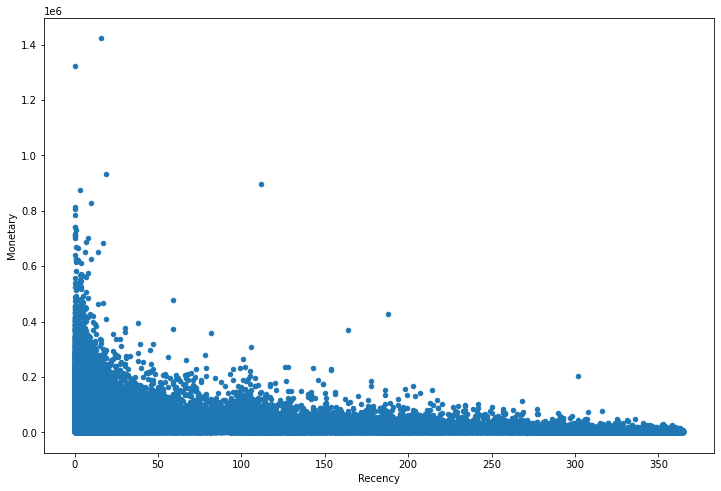

In [42]:
data_RFM_analysis.plot(x="Recency", y="Monetary", kind="scatter", figsize=(12,8))

По графику видно, что у клиентов с недавним посещением магазина сумма покупок выше. Это не совсем информативно. Можно только предположить, что в числе таких клиентов, есть постоянные клиенты, которые совершили уже много покупок, и естественно, что сумма их покупок будет больше, чем у остальных.

Подтверждением может служить график зависимости Recency (давность последней покупки) и Frequency (общее число покупок)

<AxesSubplot:xlabel='Recency', ylabel='Frequency'>

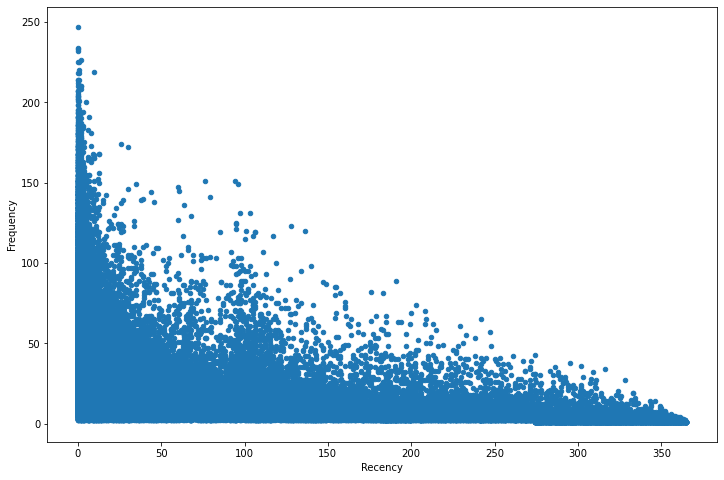

In [73]:
data_RFM_analysis.plot(x="Recency", y="Frequency", kind="scatter", figsize=(12,8))

Попробуем ввести другую характеристику Monetary - среднюю покупку клиента.

In [ ]:
data_RFM_analysis_ = data_RFM_analysis.copy(deep=True)

In [ ]:
data_RFM_analysis_['mean_sales'] = data_RFM_analysis_['Monetary'] / data_RFM_analysis_['Frequency']

<AxesSubplot:xlabel='Recency', ylabel='mean_sales'>

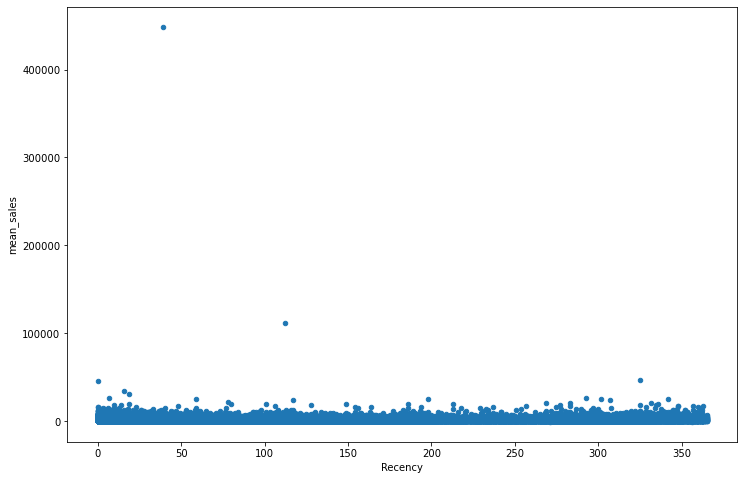

In [46]:
data_RFM_analysis_.plot(x="Recency", y="mean_sales", kind="scatter", figsize=(12,8))

Наблюдам пару выбросов, где средняя покупка более 100тыс. (что это за клиенты такие!? - тема для отдельного анализа).

In [62]:
data_RFM_analysis_[data_RFM_analysis_['mean_sales'] >= 100000]

,client,last_date,Frequency,Monetary,Recency,mean_sales,R,F,M,RFM,churn
5142,0d1a0eccc30dd37d84c8351c27c419aa,2017-06-14,8,896465.0,112,112058.125,1,1,3,113,1
34739,596f837a638189cb15e9d4b144dd45c4,2017-08-26,10,4487191.0,39,448719.100,2,1,3,213,0


Удалим этих клиентов из нашего датасета.

In [47]:
data_RFM_analysis_ = data_RFM_analysis_[data_RFM_analysis_['mean_sales'] < 100000]

<AxesSubplot:xlabel='Recency', ylabel='mean_sales'>

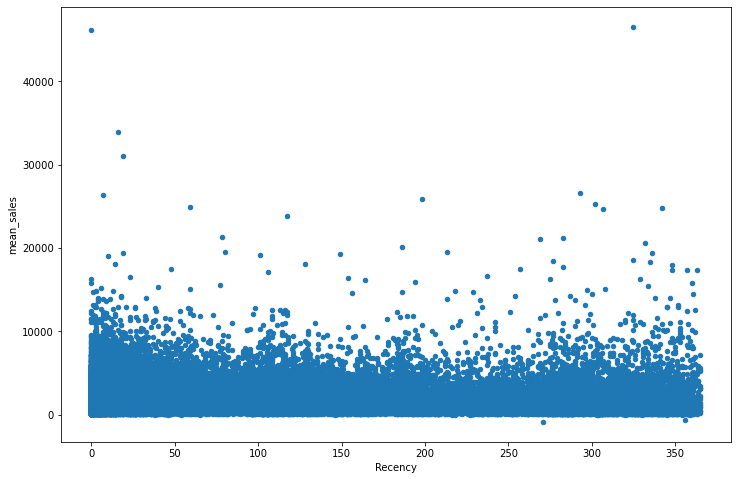

In [48]:
data_RFM_analysis_.plot(x="Recency", y="mean_sales", kind="scatter", figsize=(12,8))

Сложно представить клиентов, у которых средняя сумма покупок более 30тыс. в продуктовом магазине, но пока оставим таких клиентов.

А вот выбросы, где средняя сумма покупки менее 0 (что тоже является темой для отдельного анализа), лучше убрать.

In [63]:
data_RFM_analysis_[data_RFM_analysis_['mean_sales'] <= 0]

,client,last_date,Frequency,Monetary,Recency,mean_sales,R,F,M,RFM,churn
43483,6fb3760c61dabb7198cd23d4d47fbd76,2017-01-06,3,-2584.06,271,-861.353333,1,1,1,111,1
44192,7191556768d80a7c3d632d62cd796b3b,2016-10-13,1,-581.01,356,-581.010000,1,1,1,111,1
94416,f1a29ee132ae1f6d399c68c1e50f3d17,2016-10-24,2,0.00,345,0.000000,1,1,1,111,1


Уберем из датасета этих клиентов.

In [51]:
data_RFM_analysis_ = data_RFM_analysis_[data_RFM_analysis_['mean_sales'] > 0]

In [56]:
# colors=data_RFM_analysis_.groupby("RFM").grouper.group_info[0].tolist()
# data_RFM_analysis_.plot(x="Recency", y="mean_sales", c=colors, kind="scatter", figsize=(12,8))

<AxesSubplot:xlabel='Recency', ylabel='mean_sales'>

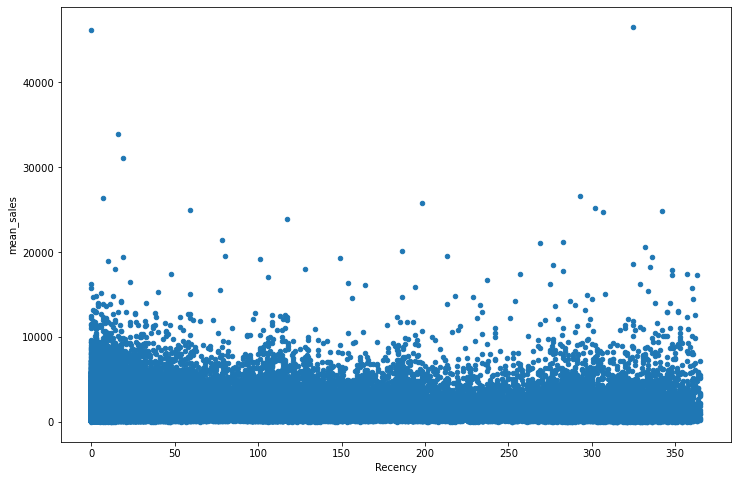

In [64]:
data_RFM_analysis_.plot(x="Recency", y="mean_sales", kind="scatter", figsize=(12,8))

Видно, что теперь клиенты распределяются более равномерно (средняя сумма покупки не зависит от того, когда клиент совершил последнюю покупку).

In [53]:
data_RFM_analysis_.describe()

,Frequency,Monetary,Recency,mean_sales,R,F,M,RFM,churn
count,99995.000000,9.999500e+04,99995.000000,99995.000000,99995.00000,99995.000000,99995.000000,99995.000000,99995.000000
mean,24.803140,3.940645e+04,65.543957,1767.134745,2.00366,1.980799,2.010001,222.184009,0.337587
std,25.877046,5.003496e+04,89.147843,1456.166513,0.82391,0.823755,0.818474,87.875526,0.472889
min,1.000000,3.000000e+01,0.000000,15.000000,1.00000,1.000000,1.000000,111.000000,0.000000
25%,8.000000,9.451500e+03,5.000000,835.424751,1.00000,1.000000,1.000000,121.000000,0.000000
50%,16.000000,2.255700e+04,21.000000,1401.000000,2.00000,2.000000,2.000000,222.000000,0.000000
75%,32.000000,5.011482e+04,101.000000,2258.978478,3.00000,3.000000,3.000000,322.000000,1.000000
max,247.000000,1.424631e+06,365.000000,46555.000000,3.00000,3.000000,3.000000,333.000000,1.000000


Если в качестве показателя Monetary взять не общую сумму покупок, а среднюю сумму покупки, то клиенты распределяться по группам несколько по-иному.

In [59]:
# разобьем всех клиентов на три группы по показателю Monetary (теперь уже по средней сумме покупки)
M_33 = data_RFM_analysis_['mean_sales'].quantile(0.33)
M_66 = data_RFM_analysis_['mean_sales'].quantile(0.66)
print(M_33, '::', M_66)

1008.0000166666667 :: 1880.6680000000003


In [66]:
data_RFM_analysis_['M'] = data_RFM_analysis_.apply(
    lambda x: 1 if x.mean_sales <= M_33 else (2 if x.mean_sales <= M_66 else 3),
    axis=1)

In [67]:
#  рассчитаем RFM-код для каждого клиента
data_RFM_analysis_['RFM'] = data_RFM_analysis_['R']*100 + data_RFM_analysis_['F']*10 + data_RFM_analysis_['M']

In [75]:
# посмотрим как теперь клиенты распределились по группам
data_RFM_analysis_.groupby('RFM', as_index=False).client.count()

,RFM,client
0,111,8259
1,112,6772
2,113,8461
3,121,3059
4,122,2572
5,123,2241
6,131,1285
7,132,694
8,133,414
9,211,2288


<AxesSubplot:ylabel='client'>

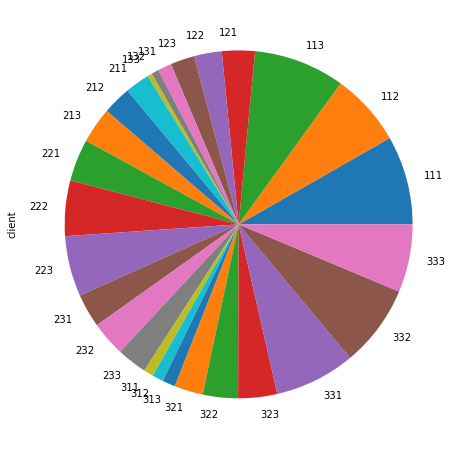

In [81]:
data_RFM_analysis_.groupby('RFM').client.count().plot(kind="pie", figsize=(12,8))

Видно, что теперь клиенты рапределились по группам более равномерно.

Приведем интерпретацию RFM-кодов.
 
![title](RFM-code.png)

Мы провели RFM-анализ для того чтобы дать характеристику клиентам. «Отток» — это клиенты, которые давно не покупали, а «Риск оттока» — которые покупали среднее количество времени назад. Активные — те, кто недавно совершил покупку.

In [ ]:
Вообще говоря можно было не проводить полный RFM-анализ, а только разделить клиентов о признаку Recency.